# Differential Equations I: Ordinary Differential Equations (ODEs)
### <i>with Code in Python and R</i>

<i>Patrick White</i></br>
<i>Dec 08, 2024</i>

<img src="img/de1.png" style="height: 400px; width:auto;">

# Outline

<ul>
<li>What are Differential Equations?</li>
<li>Examples of ODEs</li>
<ul>
<li>Gas Molecules Leaking from a Container</li>
<li>Logistic Growth Equation</li>
<li>Predator-Prey Population Dynamics</li>
<li>Outbreak Modeling</li>
</ul>
<li>Logistic Growth Equation in Python and R</li>
<ul>
<li>Python</li>
<li>R</li>
</ul>
<li>What’s Next?</li>
</ul>

# What are Differential Equations?

A differential equation is an equation that associates a function with its derivatives, or is affected by the derivatives of one or more functions. They arise when it is easier to describe change than absolute amounts. An ordinary differential equation (ODE) relates a function to its own derivatives with respect to a single variable, and a partial differential equation (PDE) relates a multivariate function to its partial derivatives. The ‘order’ of the differential equation is determined by the highest-order derivative.

The simplest ODE one could construct is $y’ = f(x)$. Solving for $y$ is the problem of integrating $f$ (differential equations generalize integration). If $F$ is an antiderivative of $f$, any other antiderivative of $f$ is given by $F(x)+C$, where $C$ is an arbitrary constant.

$y(x) = F(x) + C$

$y(x) = \displaystyle \int f(x) ~dx + C$

The fundamental theorem of calculus tells us that:

$y(x) - y(x_0) = \displaystyle \int_0^x y'(t) ~dt = \displaystyle \int_{x_0}^x f(t) ~dt$

For a certain class of ODEs, initial value problems, the initial value is sufficient to find a unique particular solution. In finite difference methods, we simply discretize to solve continuous problems.

# Examples of ODEs

### Gas Molecules Leaking from a Container

Though more sophisticated alternatives exist, a simple way to describe the number of gas molecules leaking from a container is:
    
$\frac{dy}{dt} = -ky(t)$

- $y(t)$ represents the amount of gas (or pressure) inside the container.

- $\frac{dy}{dt}$ is the rate of change, which is proportional to the amount of gas present at time $t$ (more gas = more leakage).

- $k$ is a constant that encapsulates factors such as area of the hole, properties of the gas, and temperature.

We can solve this symbolically, simply by separating the variables and integrating:

- $\frac{1}{y(t)} \frac{dy}{dt} = -k$

- $ln|y(t)| = kt + C$

- $y(t) = y_0 ~e^{-kt}$

### Logistic Growth Equation

Population growth in an environment with limited carrying capacity can be modeled with the logistic growth equation:
    
$\frac{dP}{dt} = r P \left( 1 - \frac{P}{k} \right)$

- $P$ is the population
- $r$ is the growth rate
- $k$ is the carrying capacity

Through a number of steps, we can also derive the solution symbolically.

$P(t) = \frac{K}{1 + \frac{K - P_0}{P_0} e^{-rt}}$

### Predator-Prey Population Dynamics

Differential equations can also come in systems. For example, the Lotka-Volterra equations (this is the 2D version) describe population dynamics in a predator-prey relationship.

$\frac{d}{dt}x = x(\alpha - \beta y) = ax - \beta xy$

$\frac{d}{dt}y = y(-\gamma + \delta x) = -\gamma x + \delta xy$

where $x$ and $y$ are the prey and predator population respectively, and $x(t)$ and $y(t)$ are denoted as $x$ and $y$ in order to simplify the notation. The other variables are constant coefficients that represent interaction and growth rates.

### Outbreak Modeling

Though more elaborate alternatives exist, a common method of outbreak modeling is the SIR (Susceptible, Infectious, Recovered) model, which compartmentalizes the categories of the state of individuals such that we can model the size of each segment using derivatives.

$\frac{dS}{dt} = - \beta S \frac{I}{N}$

$\frac{dI}{dt} = \beta S \frac{I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

where $S$, $I$, and $R$ are the susceptible, infectious, and recovered populations respectively, and the other variables are constant coefficients.

# Logistic Growth Equation in Python and R

The below will demonstrate the solving of ODEs in Python and R, using the logistic population growth equation. We’ve shown above that it can be solved symbolically, but for other equations, a symbolic solution will not always be possible, or convenient. In each language below, we will first integrate the ODE given particular parameters, and then recover parameters given simulated data.

Recall that the equation is:
    
$\frac{dP}{dt} = r P \left( 1 - \frac{P}{k} \right)$

where $P$ is the population, $r$ is the growth rate, and $k$ is the carrying capacity. We’ll set the initial population to $100$, the growth rate to $10\%$, and the carrying capacity to $1000$.

### Python

First, we’ll solve the equation, given the simulated parameter values, using Scipy’s odeint.

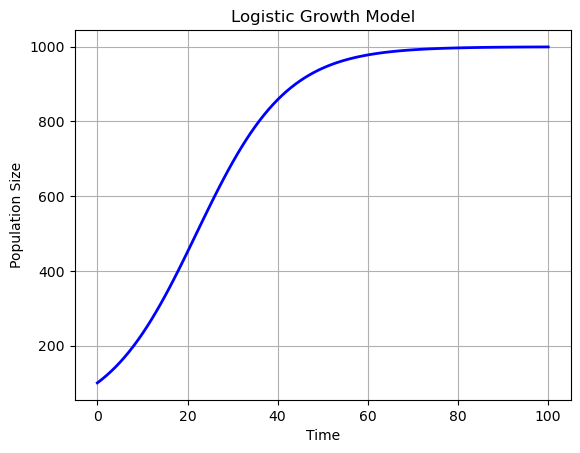

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the logistic growth model
def logistic_growth(P, t, r, k):
    dP_dt = r * P * (1 - P / k)
    return dP_dt

# Set the initial state and parameters
initial_state = 100    # Initial population
r = 0.1                # Growth rate
k = 1000               # Carrying capacity
times = np.linspace(0, 100, 101)  # Time sequence

# Solve the ODE
result = odeint(logistic_growth, initial_state, times, args=(r, k))

# Plot the results
plt.plot(times, result, color='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Logistic Growth Model')
plt.grid(True)
plt.show()

Next, we'll deterministically generate data using the same parameters, and see if the solver can then recover the true parameters. We use the <code>minimize</code> function from <code>scipy.optimize</code>, and with each iteration, call upon a loss function which integrates the equation using the current guess at parameter values, and measures the fit against the data.

In [ ]:
from scipy.optimize import minimize

# Define the logistic growth model
def logistic_growth(P, t, r, K):
    dP_dt = r * P * (1 - P / K)
    return dP_dt

# Define a function to compute the loss (e.g., mean squared error)
def loss_function(params, t, observed_data, initial_state):
    r, K = params
    solution = odeint(logistic_growth, initial_state, t, args=(r, K))
    return np.mean((solution.flatten() - observed_data) ** 2)

# Synthetic data
times = np.linspace(0, 100, 101)
observed_data = 1000 / (1 + (1000 - 100) / 100 * np.exp(-0.1 * times))  # Generate some data

# Initial guess for parameters
initial_guess = [0.05, 800]  # Starting guess for r and K
initial_state = 100

# Perform the optimization
result = minimize(loss_function, initial_guess, args=(times, observed_data, initial_state))

# Optimal parameters
optimal_r, optimal_K = result.x
print("Estimated parameters:", optimal_r, optimal_K)

Estimated parameters: 0.09999998711424758 1000.0000184181482


We can see that the parameter values found for $r$ and $k$ are correct, at $10\%$ and $1000$ respectively.

### R

We’ll now use the <code>deSolve</code> package of R to accomplish the same as above, starting with integration of the ODE given specified parameter values (initial population $100$, growth rate $10\%$, and carrying capacity $1000$).

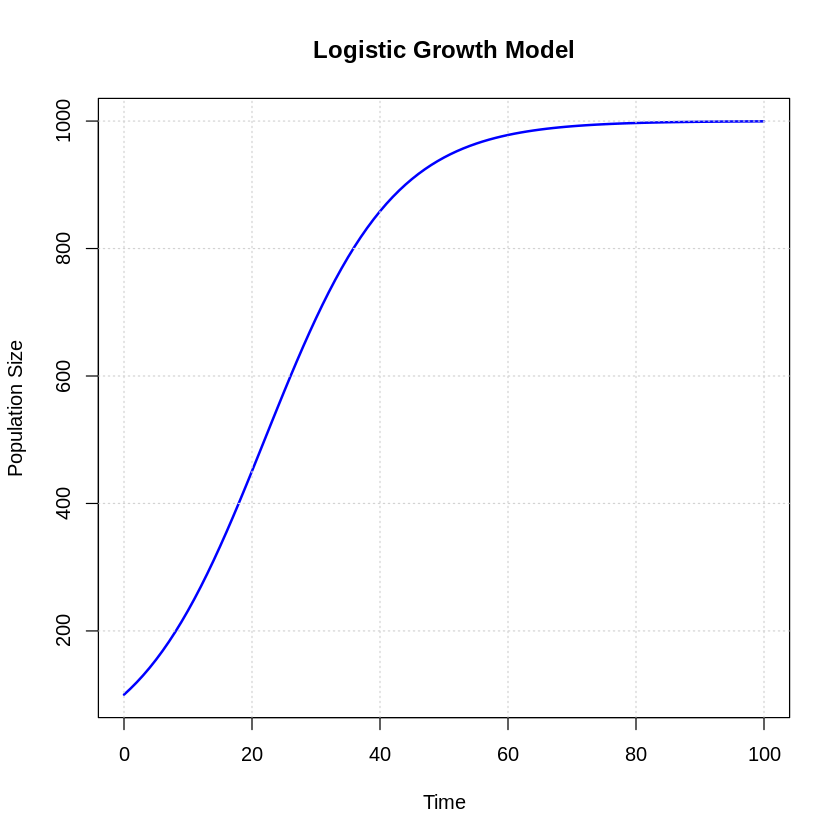

In [3]:
# install.packages('deSolve')
library(deSolve)

# Define the logistic growth model
logistic_growth <- function(t, state, parameters) {
  P <- state[1]
  r <- parameters[1]
  K <- parameters[2]

  # Define the rate of change
  dP <- r * P * (1 - P / K)

  # Return the rate of change
  return(list(c(dP)))
}

# Set the initial state and parameters
initial_state <- c(P = 100)  # Initial population
parameters <- c(r = 0.1, K = 1000)  # Growth rate and carrying capacity
times <- seq(0, 100, by = 1)  # Time sequence

# Solve the ODE
out <- ode(y = initial_state, times = times, func = logistic_growth, parms = parameters)

# Convert output to a data frame for easier plotting
out_df <- as.data.frame(out)

# Plot the results
plot(out_df$time, out_df$P, type = "l", col = "blue", lwd = 2,
     xlab = "Time", ylab = "Population Size",
     main = "Logistic Growth Model")
grid()

And then simulating data with those parameter values, and recovering them as estimates from the solver.

In [4]:
# Define the logistic growth model
logistic_growth <- function(t, state, parameters) {
  P <- state[1]
  r <- parameters[1]
  k <- parameters[2]

  # Define the rate of change
  dP <- r * P * (1 - P / k)

  # Return the rate of change
  list(c(dP))
}

# Generate synthetic observed data
generate_data <- function(r, k, initial_state, times) {
  parameters <- c(r, k)
  out <- ode(y = initial_state, times = times, func = logistic_growth, parms = parameters)
  as.data.frame(out)$P
}

# Set known parameters for generating synthetic data
true_r <- 0.1
true_k <- 1000
initial_state <- c(P = 100)
times <- seq(0, 100, by = 1)
observed_data <- generate_data(true_r, true_k, initial_state, times)

# Define the loss function (e.g., mean squared error)
loss_function <- function(params) {
  r <- params[1]
  k <- params[2]
  predicted <- generate_data(r, k, initial_state, times)
  mean((predicted - observed_data) ^ 2)
}

# Initial guess for parameters
initial_guess <- c(r = 0.05, K = 800)

# Perform the optimization
result <- optim(par = initial_guess, fn = loss_function)

# Extract optimal parameters
optimal_r <- result$par[1]
optimal_k <- result$par[2]

# Display the results
cat("Estimated parameters:\n")
cat("r:", optimal_r, "\n")
cat("k:", optimal_k, "\n")

# Plot the observed data and fitted model for comparison
fitted_data <- generate_data(optimal_r, optimal_k, initial_state, times)

Estimated parameters:
r: 0.1000114 
k: 999.9792 


And we can see that the results are correct.

# What’s Next?

That concludes this first article on ordinary differential equations. The following ones will focus on compartmentalized predator-prey and outbreak modeling, using the probabilistic programming software Stan, a C++ based sampler available through Python, R, and other languages.

# References

- 3Blue1Brown. Differential Equations. https://www.3blue1brown.com/lessons/differential-equations

- Scipy User Docs. scipy.integrate.ode. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

- Scipy User Docs. scipy.optimize.minimize. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

- R Documentation. deSolve ode Function. https://www.rdocumentation.org/packages/deSolve/versions/1.40/topics/ode